In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This is for 3D plotting
from skimage import data, color

In [5]:
# Load a sample color image
image = data.astronaut()
# Convert the image to grayscale
gray_image = color.rgb2gray(image)

<Figure size 1200x400 with 0 Axes>

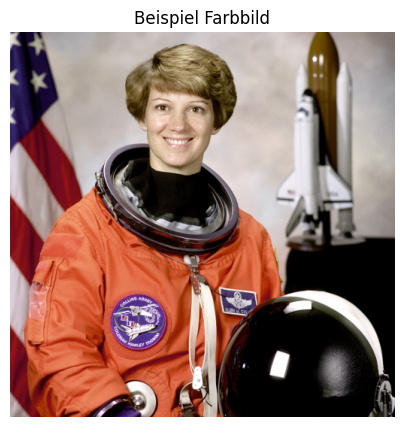

<Figure size 1200x400 with 0 Axes>

In [18]:

plt.figure(figsize=(8, 5))
plt.imshow(image)
plt.title("Beispiel Farbbild")
plt.axis('off')
# Create a figure for the color channel plots

plt.figure(figsize=(12, 4))

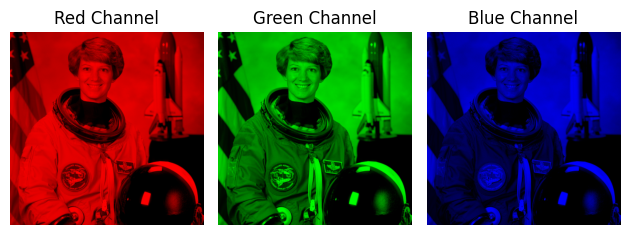

In [19]:
colors = ['Red', 'Green', 'Blue']
for i, color in enumerate(colors, start=1):
    channel_image = np.zeros(image.shape, dtype="uint8")
    channel_image[:,:,i-1] = image[:,:,i-1]
    plt.subplot(1, 3, i)
    plt.imshow(channel_image)
    plt.title(f"{color} Channel")
    plt.axis('off')

plt.tight_layout()
plt.show()

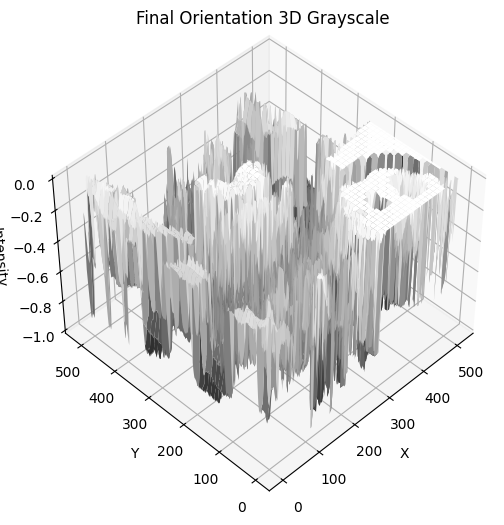

In [16]:
# Performing one last flip along the X-axis to achieve the desired orientation based on the latest instruction.
plt.figure(figsize=(8, 6))

Z = -gray_image  # Invert grayscale values for the 3D plot

# Perform the necessary flips for correct orientation
Z_flipped = np.flipud(np.fliplr(-gray_image))  # First flip to match the orientation
Z_corrected = np.flipud(Z_flipped)  # Flip vertically based on the initial correction
Z_final = np.fliplr(Z_corrected)  # Flip horizontally for the correct orientation
Z_final_x_flip = np.flipud(Z_final)  # Final flip along the X-axis for the desired view


# Plot the surface with the image correctly oriented after all adjustments
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z_final_x_flip, cmap='gray', edgecolor='none')
ax.set_title("Final Orientation 3D Grayscale")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.view_init(45, 225)  # Adjusting the viewing angle to match the final orientation correctly

plt.show()


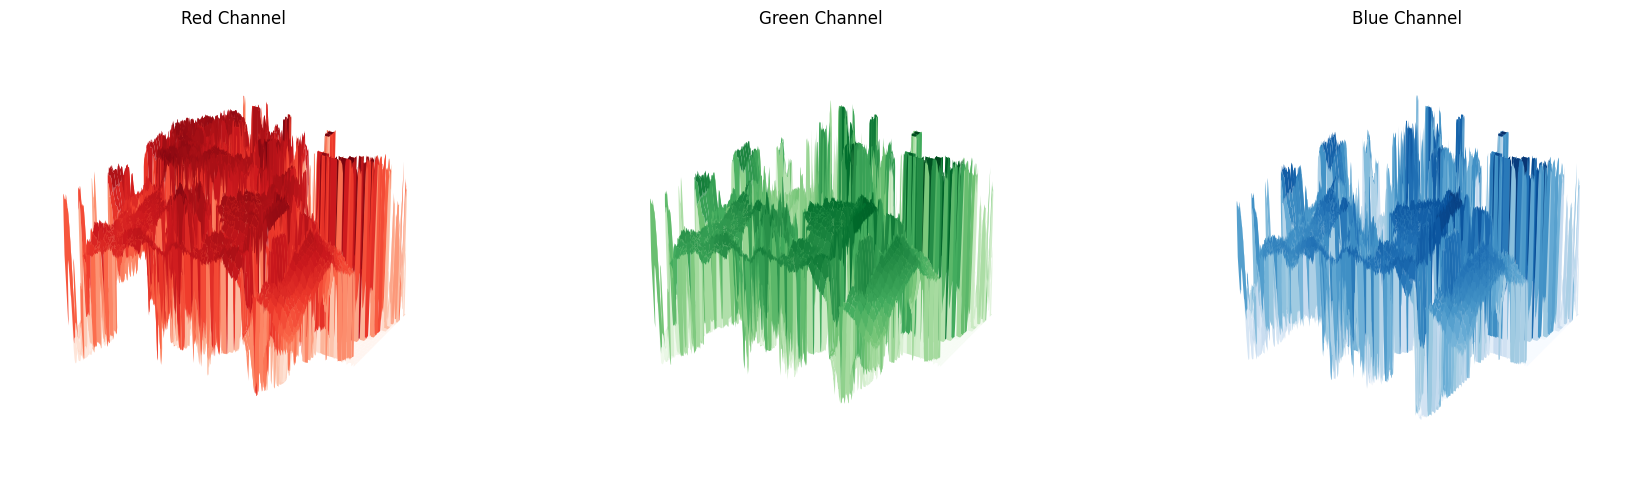

In [17]:
# 3. Plotting each color channel in a 1x3 subplot
# Adjusting the 3D plot section for correct execution

# Prepare the meshgrid
x = np.arange(image.shape[1])
y = np.arange(image.shape[0])
X, Y = np.meshgrid(x, y)

# Plotting each color channel in a 3D plot
fig = plt.figure(figsize=(18, 5))
colors = ['Red', 'Green', 'Blue']
cmaps = ['Reds', 'Greens', 'Blues']

for i, (color, cmap) in enumerate(zip(colors, cmaps), start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    
    # Extracting the specific color channel and using it as Z values for height
    Z = image[:, :, i-1] / 255.0  # Normalize the values to [0, 1] for consistent plotting
    
    # Plotting the surface
    ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='none')
    
    ax.set_title(f"{color} Channel")
    ax.axis('off')

plt.tight_layout()
plt.show()